# Final Processing of Bootes Blind source catalogue

![HELP LOGO](https://avatars1.githubusercontent.com/u/7880370?s=100&v=4>)


The final processing stage requires:
1. Quick validation of blind catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue
4. Merging MF catalogue with XID+ flux densities

In [1]:
import seaborn as sns
from astropy.table import Table,hstack
%matplotlib inline
import numpy as np
import pylab as plt

from astropy import units as u
from astropy.table import Column

import herschelhelp_internal
from herschelhelp_internal.utils import gen_help_id
import numpy.core.defchararray as np_f


## Read tables

In [2]:
cat=Table.read('./data/dmu22_XID+SPIRE_Bootes_BLIND.fits')
cat['RA'].unit=u.deg
cat['Dec'].unit=u.deg

In [3]:
cat[0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,deg,deg,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
1384,216.83469146343285,32.30486548106547,38.60862,43.313313,33.499905,18.610111,22.988752,14.341537,17.731499,22.894682,12.644978,-0.054186035,-0.09015137,-0.07167324,0.005305533,0.0073923627,0.010451002,0.99854577,0.9985964,0.99920756,2000.0,2000.0,2000.0,0.0,0.0,0.0
2389,216.96028637891257,32.38879784513622,48.81379,51.13212,46.15546,35.26526,38.23742,32.13048,6.8006606,10.631729,3.5758748,-0.054186035,-0.09015137,-0.07167324,0.005305533,0.0073923627,0.010451002,1.0006881,1.0004221,1.0006945,2000.0,2000.0,2000.0,0.002,0.0,0.0
3160,216.98470387434244,32.30938985890007,1.5930656,2.6220481,0.6664394,16.38991,19.506617,12.969491,0.5948687,1.124767,0.18894313,-0.054186035,-0.09015137,-0.07167324,0.005305533,0.0073923627,0.010451002,0.9993304,0.998746,1.0005128,2000.0,2000.0,2000.0,0.0,0.0,0.0
3299,216.75216474261202,32.27096361903366,37.318966,42.539772,32.16349,11.504098,13.9512415,9.051861,0.8958458,1.6993258,0.3042283,-0.054186035,-0.09015137,-0.07167324,0.005305533,0.0073923627,0.010451002,0.99852496,0.9992796,0.9996253,2000.0,2000.0,2000.0,0.0,0.0,0.0
3854,216.96557266626246,32.36304153931766,24.997746,28.161108,21.625547,18.39659,22.1143,14.703232,1.3419731,3.5029461,0.36323905,-0.054186035,-0.09015137,-0.07167324,0.005305533,0.0073923627,0.010451002,0.9998452,0.999163,1.0002427,2000.0,2000.0,2000.0,0.0,0.0,0.013
4671,216.9040949489291,32.29696747230436,21.853088,27.710247,16.116243,2.2474527,4.3459916,0.6593055,0.8223688,1.7909786,0.24378788,-0.054186035,-0.09015137,-0.07167324,0.005305533,0.0073923627,0.010451002,0.9994894,1.0003002,0.9991738,2000.0,2000.0,2000.0,0.0,0.0,0.0
5000,216.85161070855477,32.33694860618468,29.050058,32.035824,26.19089,8.802275,12.013272,5.638985,14.135133,17.78596,10.146422,-0.054186035,-0.09015137,-0.07167324,0.005305533,0.0073923627,0.010451002,0.99872637,0.9987364,0.9989994,2000.0,2000.0,2000.0,0.0,0.001,0.0
5969,216.8079749962344,32.33344049868627,27.640207,31.049795,24.38271,13.986638,17.193256,10.980188,1.8294557,4.1499515,0.51276547,-0.054186035,-0.09015137,-0.07167324,0.005305533,0.0073923627,0.010451002,0.9986691,0.9984233,0.99914503,2000.0,2000.0,2000.0,0.0,0.0,0.0


## Look at Symmetry of PDFs to determine depth level of catalogue

/Users/Steven/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Steven/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Steven/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


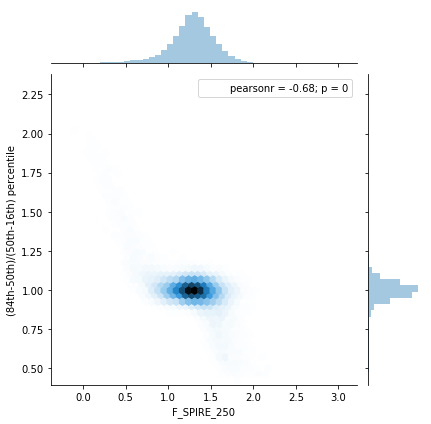

In [4]:
skew=(cat['FErr_SPIRE_250_u']-cat['F_SPIRE_250'])/(cat['F_SPIRE_250']-cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew, kind='hex')

For 250 $\mathrm{\mu m}$ depth is ~ 6mJy

/Users/Steven/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Steven/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Steven/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


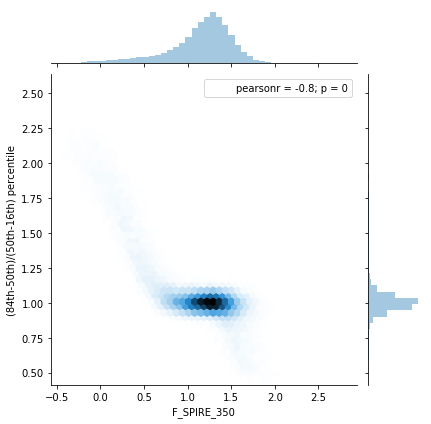

In [5]:
skew=(cat['FErr_SPIRE_350_u']-cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')


For 350 $\mathrm{\mu m}$ depth is ~ 6mJy

/Users/Steven/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/Steven/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Steven/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


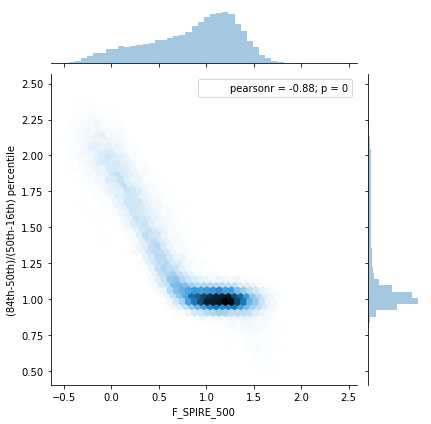

In [6]:
skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')


For 500 $\mathrm{\mu m}$ depth is ~ 6mJy

## Add flag to catalogue

In [7]:
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_250'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_350'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_500'))

In [8]:
ind_250=(cat['Pval_res_250']>0.5) | (cat['F_SPIRE_250'] < 6)
ind_350=(cat['Pval_res_350']>0.5) | (cat['F_SPIRE_350'] < 6)
ind_500=(cat['Pval_res_500']>0.5) | (cat['F_SPIRE_500'] < 6)

In [9]:
print(ind_250.sum(),ind_350.sum(),ind_500.sum(),len(cat))

9569 12285 14719 30566


In [10]:
cat['flag_spire_250'][ind_250]=True
cat['flag_spire_350'][ind_350]=True
cat['flag_spire_500'][ind_500]=True

In [11]:
# set XID+ cahtalogue back to orignal order of objects, as used in MF detection files
use = cat['HELP_ID'].astype(int) -1
use = np.argsort(use)
cat = cat[use]

In [13]:
# Reads MF table, removes duplicate RA and DEC
cat2=Table.read('./data/Bootes_SPIRE_all.fits')
print('# galaxies = ',np.size(cat2['RA']))
print('# galaxies = ',np.size(cat['RA']))
del cat2['RA']
del cat2['Dec']
cat_all = hstack([cat,cat2])

# galaxies =  30566
# galaxies =  30566


In [14]:
# Created HELP_ID, and changes HELP to HELP_BLIND to avoid confusion with HELP-Masterlist objects
ID = gen_help_id(cat_all['RA'], cat_all['Dec'])
ID_new = [IDs.replace('HELP','HELP_BLIND') for IDs in ID]
ID_new = Column(ID_new,name="HELP_ID")
cat_all['HELP_ID'] = ID_new

In [15]:
# all flux denisties are in mJy in the final BLIND catalogues
cat_all['F_BLIND_MF_SPIRE_250'].unit = 'mJy'
cat_all['F_BLIND_MF_SPIRE_250'] = 1000*cat_all['F_BLIND_MF_SPIRE_250']
cat_all['FErr_BLIND_MF_SPIRE_250'].unit = 'mJy'
cat_all['FErr_BLIND_MF_SPIRE_250'] = 1000*cat_all['FErr_BLIND_MF_SPIRE_250']

cat_all['F_BLIND_MF_SPIRE_350'].unit = 'mJy'
cat_all['F_BLIND_MF_SPIRE_350'] = 1000*cat_all['F_BLIND_MF_SPIRE_350']
cat_all['FErr_BLIND_MF_SPIRE_350'].unit = 'mJy'
cat_all['FErr_BLIND_MF_SPIRE_350'] = 1000*cat_all['FErr_BLIND_MF_SPIRE_350']

cat_all['F_BLIND_MF_SPIRE_500'].unit = 'mJy'
cat_all['F_BLIND_MF_SPIRE_500'] = 1000*cat_all['F_BLIND_MF_SPIRE_500']
cat_all['FErr_BLIND_MF_SPIRE_500'].unit = 'mJy'
cat_all['FErr_BLIND_MF_SPIRE_500'] = 1000*cat_all['FErr_BLIND_MF_SPIRE_500']

cat_all['F_BLIND_pix_SPIRE'].unit = 'mJy'
cat_all['F_BLIND_pix_SPIRE'] = 1000*cat_all['F_BLIND_pix_SPIRE']
cat_all['FErr_BLIND_pix_SPIRE'].unit = 'mJy'
cat_all['FErr_BLIND_pix_SPIRE'] = 1000*cat_all['FErr_BLIND_pix_SPIRE']


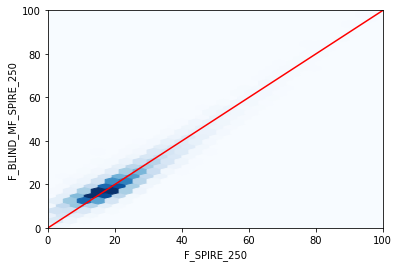

In [16]:
# XID+ flux density vs. MF flux densities
plt.hexbin(cat_all['F_SPIRE_250'],cat_all['F_BLIND_MF_SPIRE_250'], cmap=plt.cm.Blues,gridsize=(400,400))
plt.plot([0,100],[0,100], color = 'red')
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel('F_SPIRE_250')
plt.ylabel('F_BLIND_MF_SPIRE_250')
plt.show()


In [17]:
# Add field name
cat_all.add_column(Column(['Bootes']*len(cat_all),name='field'))


In [18]:
cat_all.write('./data/dmu22_XID+SPIRE_Bootes_BLIND_Matched_MF.fits', format='fits',overwrite=True)

*This is a default HELP jupyter notebook *

 ![HELP LOGO](https://avatars1.githubusercontent.com/u/7880370?s=75&v=4)

**Authors**: S. Duivenvoorden

 
For a full description of the database and how it is organised in to `dmu_products` please the top level [readme](../readme.md).
 
The Herschel Extragalactic Legacy Project, ([HELP](http://herschel.sussex.ac.uk/)), is a [European Commission Research Executive Agency](https://ec.europa.eu/info/departments/research-executive-agency_en)
funded project under the SP1-Cooperation, Collaborative project, Small or medium-scale focused research project, FP7-SPACE-2013-1 scheme, Grant Agreement
Number 607254.

[Acknowledgements](http://herschel.sussex.ac.uk/acknowledgements)